<a href="https://colab.research.google.com/github/krymbeaulieu/CMPE_256_Book_Recommender/blob/main/shabab/Shabab_Project_Special_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import kagglehub
except ModuleNotFoundError:
    !pip install kagglehub
    import kagglehub
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

In [2]:
# Import all required libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
# Download latest version
path = kagglehub.dataset_download("arashnic/book-recommendation-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/book-recommendation-dataset/versions/3


In [4]:
# get all the csv from the dataset
user_path = list(Path(path).glob("*User*.csv"))[0]
book_path = list(Path(path).glob("*Book*.csv"))[0]
rating_path = list(Path(path).glob("*Rating*.csv"))[0]
# load the csv as a dataframe
books_df = pd.read_csv(book_path,low_memory=False)
ratings_df = pd.read_csv(rating_path)
users_df = pd.read_csv(user_path)

In [6]:
# view the contents of the users dataframe
users_df.head()
# contains user_id, location, age

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
# view contents of the ratings dataframe
ratings_df.head()
# contents include the user_id, ISBN, and book rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
# view contents of the books dataframe
books_df.head()
# contents include ISBN, book title, book author, publication year, and publisher

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
# create a user rating dataframe by merging the users and ratings on the user_id
user_rating_df = pd.merge(users_df,ratings_df,on="User-ID")
user_rating_df.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [10]:
# consolidate user ratings and books on ISBN
data = pd.merge(user_rating_df,books_df,on="ISBN")
data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [12]:
# remove the 0 ratings from data
data = data[data['Book-Rating']!=0]
data.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
5,67544,"toronto, ontario, canada",30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
8,116866,"ottawa, ,",NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
9,123629,"kingston, ontario, canada",NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [16]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


WITH FILTERED DATA (REMOVING REVIEW SCORES WITH 0)

In [59]:
n_ratings = len(data)
n_books = len(data['ISBN'].unique())
n_users = len(data['User-ID'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_books, 2)}")

Number of ratings: 383842
Number of unique movieId's: 149836
Number of unique users: 68091
Average ratings per user: 5.64
Average ratings per movie: 2.56


In [60]:
user_freq = data[['User-ID', 'ISBN']].groupby(
    'User-ID').count().reset_index()
user_freq.columns = ['User-ID', 'n_ratings']
print(user_freq.head())

   User-ID  n_ratings
0        8          7
1        9          1
2       12          1
3       14          3
4       16          1


In [61]:
# Find Lowest and Highest rated movies:
mean_rating = data.groupby('ISBN')[['Book-Rating']].mean()
# Lowest rated movies
lowest_rated = mean_rating['Book-Rating'].idxmin()
data.loc[data['ISBN'] == lowest_rated]
# Highest rated movies
highest_rated = mean_rating['Book-Rating'].idxmax()
data.loc[data['ISBN'] == highest_rated]
# show number of people who rated movies rated movie highest
data[data['ISBN']==highest_rated]
# show number of people who rated movies rated movie lowest
data[data['ISBN']==lowest_rated]

## the above movies has very low dataset. We will use bayesian average
book_stats = data.groupby('ISBN')[['Book-Rating']].agg(['count', 'mean'])
book_stats.columns = book_stats.columns.droplevel()

In [62]:
# Now, we create user-item matrix using scipy csr matrix
from scipy.sparse import csr_matrix

def create_matrix(df):

    N = len(df['User-ID'].unique())
    M = len(df['ISBN'].unique())

    # Map Ids to indices
    user_mapper = dict(zip(np.unique(df["User-ID"]), list(range(N))))
    book_mapper = dict(zip(np.unique(df["ISBN"]), list(range(M))))

    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["User-ID"])))
    book_inv_mapper = dict(zip(list(range(M)), np.unique(df["ISBN"])))

    user_index = [user_mapper[i] for i in df['User-ID']]
    book_index = [book_mapper[i] for i in df['ISBN']]

    X = csr_matrix((df["Book-Rating"], (book_index, user_index)), shape=(M, N))

    return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_matrix(data)

In [63]:
book_titles = dict(zip(data['ISBN'], data['Book-Title']))

# get all book titles from data
book_titles = data['Book-Title'].unique()

harry_book_isbn = int(get_isbn_from_title("Harry Potter and the Sorcerer's Stone (Book 1)"))

In [64]:
# get all book titles from data
book_titles = data['Book-Title'].unique()
harry_book_isbn = get_isbn_from_title("Harry Potter and the Sorcerer's Stone (Book 1)")
harry_book_isbn

'0590353403'

In [ ]:
book_titles = dict(zip(books_df['ISBN'], books_df['Book-Title']))

In [ ]:
book_titles[harry_book_isbn]

"Harry Potter and the Sorcerer's Stone (Book 1)"

In [ ]:
book_ind = book_mapper[harry_book_isbn]
book_ind

144129

In [65]:
"""
Find similar books using KNN
"""
from sklearn.neighbors import NearestNeighbors

def get_title_from_isbn(isbn):
  # get the associated book title from the ISBN
  return books_df[books_df['ISBN'] == isbn]['Book-Title'].values[0]

def get_isbn_from_title(title):
  # get the associated ISBN from the book title
  return books_df[books_df['Book-Title'] == title]['ISBN'].values[0]

def find_similar_books(book_id, X, k, metric='cosine', show_distance=False):

    neighbour_ids = []

    book_ind = book_mapper[book_id]
    book_vec = X[book_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    book_vec = book_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(book_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(book_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids


book_titles = dict(zip(books_df['ISBN'], books_df['Book-Title']))

harry_book_isbn = get_isbn_from_title("Harry Potter and the Sorcerer's Stone (Book 1)")
similar_ids = find_similar_books(harry_book_isbn, X, k=10)
book_title = book_titles[harry_book_isbn]

print(f"Since you read {book_title}")
for i in similar_ids:
    print(book_titles[i])

Since you read Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Prisoner of Azkaban (Book 3)
Taran Wanderer (Chronicles of Prydain (Paperback))
The Hobbit: or There and Back Again
Dragons of a Vanished Moon (Dragonlance: The War of Souls, Book 3)
The Complete Tales of Winnie-The-Pooh
Miss Zukas and the Stroke of Death (Miss Zukas Mysteries)


In [ ]:
# get all book titles from data
book_titles = data['Book-Title'].unique()
book_titles

array(['Clara Callan', 'Decision in Normandy',
       'Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It',
       ..., 'Why stop?: A guide to Texas historical roadside markers',
       "The Are You Being Served? Stories: 'Camping In' and Other Fiascoes",
       'Dallas Street Map Guide and Directory, 2000 Edition'],
      dtype=object)

WITH FULL DATA

In [17]:
n_ratings = len(ratings_df)
n_books = len(ratings_df['ISBN'].unique())
n_users = len(ratings_df['User-ID'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_books}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_books, 2)}")

Number of ratings: 1149780
Number of unique movieId's: 340556
Number of unique users: 105283
Average ratings per user: 10.92
Average ratings per movie: 3.38


In [18]:
user_freq = ratings_df[['User-ID', 'ISBN']].groupby(
    'User-ID').count().reset_index()
user_freq.columns = ['User-ID', 'n_ratings']
print(user_freq.head())

   User-ID  n_ratings
0        2          1
1        7          1
2        8         18
3        9          3
4       10          2


In [19]:
# Find Lowest and Highest rated movies:
mean_rating = ratings_df.groupby('ISBN')[['Book-Rating']].mean()
# Lowest rated movies
lowest_rated = mean_rating['Book-Rating'].idxmin()
data.loc[data['ISBN'] == lowest_rated]
# Highest rated movies
highest_rated = mean_rating['Book-Rating'].idxmax()
data.loc[data['ISBN'] == highest_rated]
# show number of people who rated movies rated movie highest
ratings_df[ratings_df['ISBN']==highest_rated]
# show number of people who rated movies rated movie lowest
ratings_df[ratings_df['ISBN']==lowest_rated]

## the above movies has very low dataset. We will use bayesian average
book_stats = ratings_df.groupby('ISBN')[['Book-Rating']].agg(['count', 'mean'])
book_stats.columns = book_stats.columns.droplevel()

In [43]:
# Now, we create user-item matrix using scipy csr matrix
from scipy.sparse import csr_matrix

def create_matrix(df):

    N = len(df['User-ID'].unique())
    M = len(df['ISBN'].unique())

    # Map Ids to indices
    user_mapper = dict(zip(np.unique(df["User-ID"]), list(range(N))))
    book_mapper = dict(zip(np.unique(df["ISBN"]), list(range(M))))

    # Map indices to IDs
    user_inv_mapper = dict(zip(list(range(N)), np.unique(df["User-ID"])))
    book_inv_mapper = dict(zip(list(range(M)), np.unique(df["ISBN"])))

    user_index = [user_mapper[i] for i in df['User-ID']]
    book_index = [book_mapper[i] for i in df['ISBN']]

    X = csr_matrix((df["Book-Rating"], (book_index, user_index)), shape=(M, N))

    return X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper

X, user_mapper, book_mapper, user_inv_mapper, book_inv_mapper = create_matrix(ratings_df)

In [ ]:
book_titles = dict(zip(books_df['ISBN'], books_df['Book-Title']))

# get all book titles from data
book_titles = data['Book-Title'].unique()

harry_book_isbn = int(get_isbn_from_title("Harry Potter and the Sorcerer's Stone (Book 1)"))

In [48]:
# get all book titles from data
book_titles = data['Book-Title'].unique()
harry_book_isbn = get_isbn_from_title("Harry Potter and the Sorcerer's Stone (Book 1)")
harry_book_isbn

'0590353403'

In [49]:
book_titles = dict(zip(books_df['ISBN'], books_df['Book-Title']))

In [51]:
book_titles[harry_book_isbn]

"Harry Potter and the Sorcerer's Stone (Book 1)"

In [53]:
book_ind = book_mapper[harry_book_isbn]
book_ind

144129

In [57]:
"""
Find similar books using KNN
"""
from sklearn.neighbors import NearestNeighbors

def get_title_from_isbn(isbn):
  # get the associated book title from the ISBN
  return books_df[books_df['ISBN'] == isbn]['Book-Title'].values[0]

def get_isbn_from_title(title):
  # get the associated ISBN from the book title
  return books_df[books_df['Book-Title'] == title]['ISBN'].values[0]

def find_similar_books(book_id, X, k, metric='cosine', show_distance=False):

    neighbour_ids = []

    book_ind = book_mapper[book_id]
    book_vec = X[book_ind]
    k+=1
    kNN = NearestNeighbors(n_neighbors=k, algorithm="brute", metric=metric)
    kNN.fit(X)
    book_vec = book_vec.reshape(1,-1)
    neighbour = kNN.kneighbors(book_vec, return_distance=show_distance)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(book_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids


book_titles = dict(zip(books_df['ISBN'], books_df['Book-Title']))

harry_book_isbn = get_isbn_from_title("Harry Potter and the Sorcerer's Stone (Book 1)")
similar_ids = find_similar_books(harry_book_isbn, X, k=10)
book_title = book_titles[harry_book_isbn]

print(f"Since you read {book_title}")
for i in similar_ids:
    print(book_titles[i])

Since you read Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Prisoner of Azkaban (Book 3)
Taran Wanderer (Chronicles of Prydain (Paperback))
The Hobbit: or There and Back Again
Dragons of a Vanished Moon (Dragonlance: The War of Souls, Book 3)
Miss Zukas and the Stroke of Death (Miss Zukas Mysteries)
The Complete Tales of Winnie-The-Pooh


In [14]:
# get the rating scale
print(f"(min, max) rating scale ({data['Book-Rating'].min()}, {data['Book-Rating'].max()})")
# rating scale should be from 1 - 10

(min, max) rating scale (1, 10)


In [15]:
# find the average book ratings for every user
mean_ratings = data.groupby("User-ID")['Book-Rating'].mean()
# return the average ratings above a 5
mean_ratings[mean_ratings>5]

,Book-Rating
User-ID,
8,5.571429
9,6.000000
12,10.000000
14,5.333333
16,9.000000
...,...
278846,8.000000
278849,9.000000
278851,6.500000


In [17]:
user_rating_counts = user_rating_df.groupby("User-ID")['Book-Rating'].count()
print(f"(min, max) number of reviews ({user_rating_counts.min()}, {user_rating_counts.max()})")
print(sorted(user_rating_counts)[-20:])

(min, max) number of reviews (1, 13602)
[2421, 2448, 2459, 2504, 2507, 2512, 2529, 2674, 2948, 2991, 3067, 3100, 3367, 4533, 4785, 5850, 5891, 6109, 7550, 13602]


User-ID
11676    13602
Name: Book-Rating, dtype: int64


Text(0.5, 1.0, "User 11676 Most Reviews' Review Spread")

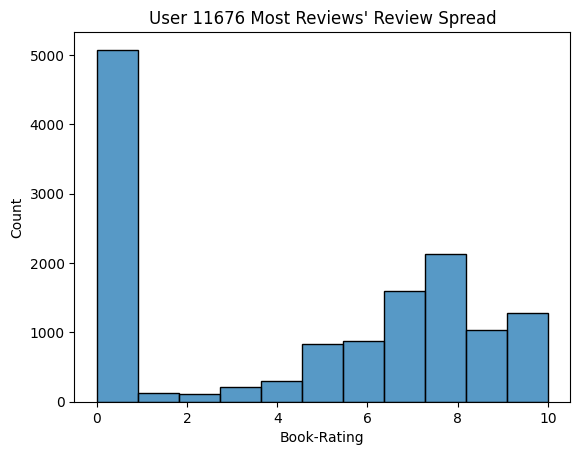

In [18]:
print(user_rating_counts[user_rating_counts == 13602])
# who is this person who rated 13602 books?!
# it is double the last rating!
sorted(user_rating_counts)[-10:]
user_rating_df[user_rating_df['User-ID']==11676]['Book-Rating'].mean()
ax = sns.histplot(user_rating_df[user_rating_df['User-ID']==11676]['Book-Rating'],bins=11)
ax.set_title("User 11676 Most Reviews' Review Spread")
# well.. this user has 5000 0 rating reviews.

Text(0.5, 1.0, "Histogram of Users' number of ratings")

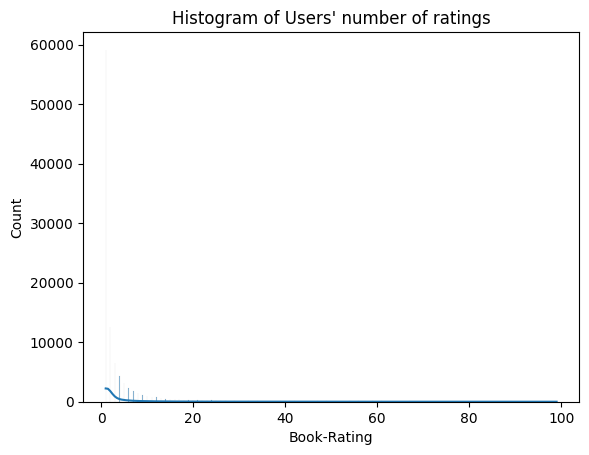

In [19]:
user_rating_counts = user_rating_df.groupby("User-ID")['Book-Rating'].count()
ax = sns.histplot(user_rating_counts[user_rating_counts<100],kde=True)
ax.set_title("Histogram of Users' number of ratings")

Text(0.5, 1.0, 'Histogram of mean book rating')

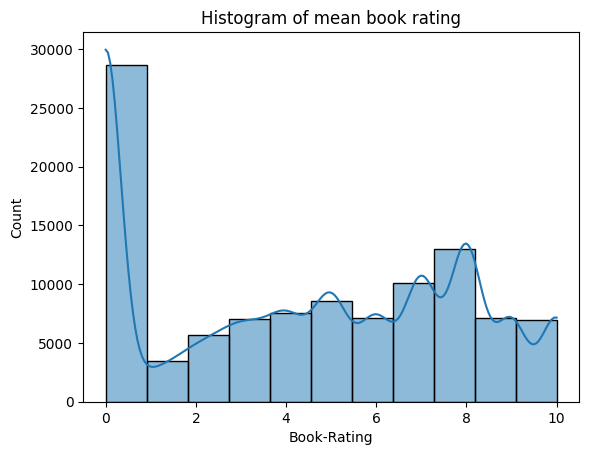

In [20]:
ax = sns.histplot(mean_ratings,bins=11,kde=True)
ax.set_title("Histogram of mean book rating")

In [24]:
# get total average review
print(f"Average review: {data['Book-Rating'].mean()}")

Average review: 7.626700569505161


In [25]:
# Computes counts for ratings
data['counts'] = [1 for x in range(data.shape[0])]
data[['Book-Rating','counts']].groupby(by='Book-Rating').count().sort_values(by='counts',ascending=False).T

Book-Rating,8,10,7,9,5,6,4,3,2,1
counts,91804,71225,66402,60778,45355,31687,7617,5118,2375,1481


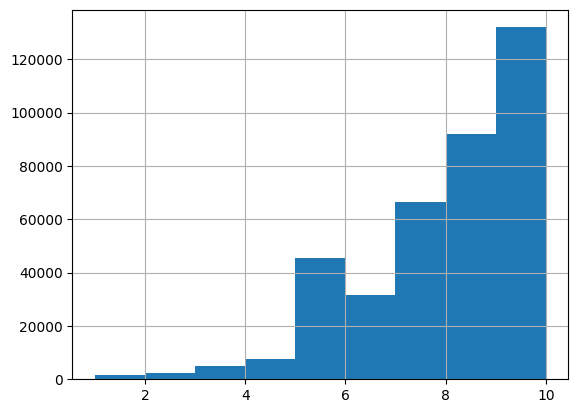

In [26]:
# Plots the histogram of ratings
tmp = data['Book-Rating'].hist(bins=9)

The data skews towards 0 (readers who read a book but did not leave a review)

In [27]:
# Computes counts for user ids (number of movies rated by each user)
data[['User-ID','counts']].groupby(by='User-ID').count().sort_values(by='counts',ascending=False).T

User-ID,11676,98391,189835,153662,23902,235105,76499,171118,16795,248718,...,85,278807,278820,278824,278825,278828,278831,278767,278772,278777
counts,6943,5691,1899,1845,1180,1020,1012,962,959,941,...,1,1,1,1,1,1,1,1,1,1


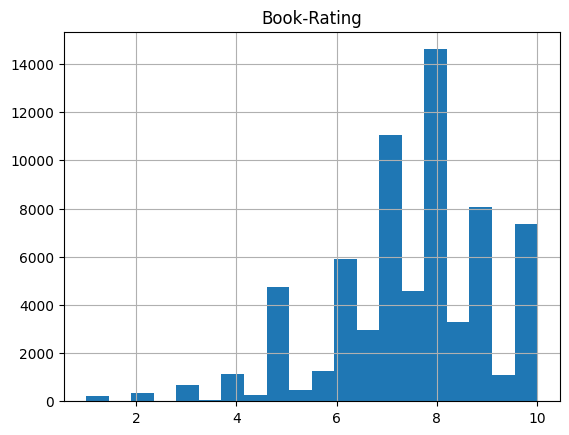

In [28]:
# Plots the histogram of average ratings per user
tmp = data[['User-ID','Book-Rating']].groupby(by='User-ID').mean().hist(bins=20)

In [29]:
# Computes counts for item ids (number of user ratings received by each movie)
data[['ISBN','counts']].groupby(by='ISBN').count().sort_values(by='counts',ascending=False).T

ISBN,0316666343,0971880107,0385504209,0312195516,0060928336,059035342X,0142001740,0446672211,044023722X,0452282152,...,B0001FZGBC,B0000C7BNG,B0000D9PEZ,B0000DAOHN,B0000DAPP1,0001055607,0001047213,000104687X,0001046438,0000913154
counts,707,581,487,383,320,313,307,295,281,278,...,1,1,1,1,1,1,1,1,1,1


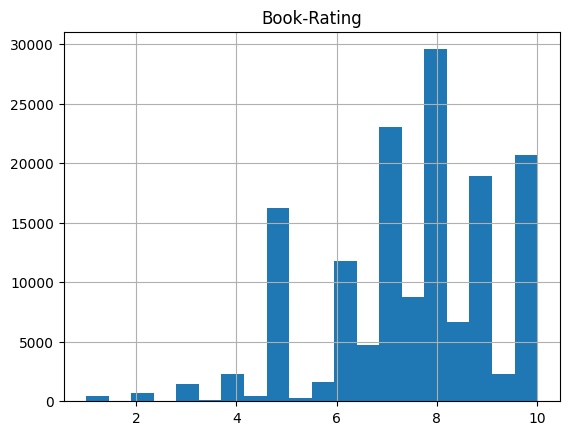

In [30]:
# Plots the histogram of average ratings per movie
tmp = data[['ISBN','Book-Rating']].groupby(by='ISBN').mean().hist(bins=20)

In [31]:
# find the average book ratings for every user
mean_ratings = data.groupby("User-ID")['Book-Rating'].mean()
# return the average ratings above a 5
mean_ratings[mean_ratings>5]

,Book-Rating
User-ID,
8,5.571429
9,6.000000
12,10.000000
14,5.333333
16,9.000000
...,...
278846,8.000000
278849,9.000000
278851,6.500000


Text(0.5, 1.0, 'Histogram of mean book rating')

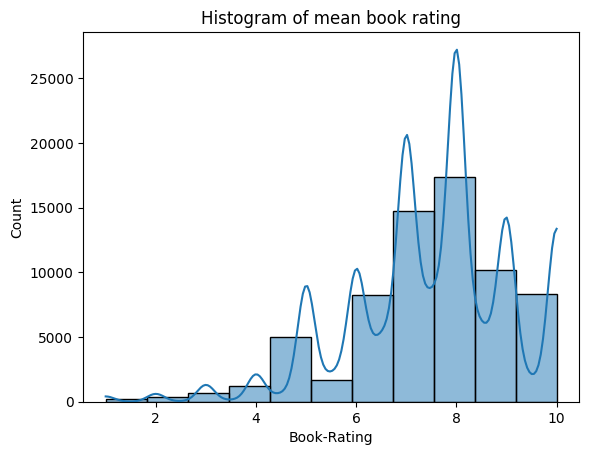

In [32]:
ax = sns.histplot(mean_ratings,bins=11,kde=True)
ax.set_title("Histogram of mean book rating")

In [33]:
# Creates some variables to be used in the section
results = dict() # dictionary to collect results from the different simulations
errordict = {'RMSE':{'key':'test_rmse','name':'Root Mean Square Error'},
             'MAE':{'key':'test_mae','name':'Mean Absolute Error'}}

In [34]:
# remove the 0 ratings from data
data = data[data['Book-Rating']!=0]

In [35]:
from surprise import Reader, Dataset

# Assuming 'data' is your DataFrame with columns 'User-ID', 'ISBN', and 'Book-Rating'
reader = Reader(rating_scale=(data['Book-Rating'].min(), data['Book-Rating'].max()))
# Create the surprise Dataset object
data_surprise = Dataset.load_from_df(data[['User-ID', 'ISBN', 'Book-Rating']], reader)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [ ]:
# # Random predictions: RMSE and MAE computed for a 10-fold cross-validation exercise
# algo = NormalPredictor()

# # Now use data_surprise in cross_validate
# scores = cross_validate(algo, data_surprise, measures=['RMSE','MAE'], cv=10, verbose=True)

#Try training with SVD

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# create a train test split from the data
# using a 75/25 train/test split
trainset, testset = train_test_split(data_surprise, test_size=0.25)

In [ ]:
best_RMSE: {'n_factors': 70, 'n_epochs': 20, 'reg_all': 0.1, 'biased': True, 'lr_all': 0.005}
best_MAE: {'n_factors': 70, 'n_epochs': 100, 'reg_all': 0.02, 'biased': True, 'lr_all': 0.001}

In [ ]:
# create an SVD trainer
algo_best_RMSE = SVD(n_factors=70, n_epochs=20, reg_all=0.1, biased=True, lr_all=0.005)
algo_best_MAE = SVD(n_factors=70, n_epochs=100, reg_all=0.02, biased=True, lr_all=0.001)

In [ ]:
# and fit on the train set
algo_best_RMSE.fit(trainset)
algo_best_MAE.fit(trainset)

In [ ]:
# make predictions on the test set
predictions_best_RMSE = algo_best_RMSE.test(testset)
predictions_best_MAE = algo_best_MAE.test(testset)

In [ ]:
accuracy.rmse(predictions_best_RMSE)
accuracy.mae(predictions_best_RMSE)

accuracy.rmse(predictions_best_MAE)
accuracy.mae(predictions_best_MAE)

RMSE: 1.6279
MAE:  1.2624
RMSE: 1.6327
MAE:  1.2611


1.2610704405972608

In [ ]:
def get_title_from_isbn(isbn):
  # get the associated book title from the ISBN
  return books_df[books_df['ISBN'] == isbn]['Book-Title'].values[0]

def get_isbn_from_title(title):
  # get the associated ISBN from the book title
  return books_df[books_df['Book-Title'] == title]['ISBN'].values[0]

def make_prediction(algo, user_id, isbn, title):
  predicted_rating = algo.predict(user_id, isbn).est
  print(f"Predicted rating for user {user_id} for '{title}' (ISBN: {isbn}): {predicted_rating}")
  return predicted_rating

def make_prediction_isbn(algo, user_id, isbn):
  # get the book title from the specified isbn
  title = get_title_from_isbn(isbn)
  # get a prediction from the user id and the given isbn
  return make_prediction(algo, user_id, isbn, title)

def make_prediction_book_title(algo, user_id, book_title):
  # get the book title from the specified isbn
  isbn = get_isbn_from_title(book_title)
  # get a prediction from the user id and the given isbn
  return make_prediction(algo, user_id, isbn, book_title)

In [ ]:
user_id = "278854"
book_title = "war of the worlds"
isbn = "0425050750"
make_prediction(algo_best_RMSE, user_id, isbn, book_title)
make_prediction(algo_best_MAE, user_id, isbn, book_title)

Predicted rating for user 278854 for 'war of the worlds' (ISBN: 0425050750): 7.6741463327363215
Predicted rating for user 278854 for 'war of the worlds' (ISBN: 0425050750): 7.691813166276327


7.691813166276327

In [ ]:
user_id = "278854"
book_title = "the silmarillion"
isbn = "0345325818"
make_prediction(algo_best_RMSE, user_id, isbn, book_title)
make_prediction(algo_best_MAE, user_id, isbn, book_title)

Predicted rating for user 278854 for 'the silmarillion' (ISBN: 0345325818): 7.891830675934402
Predicted rating for user 278854 for 'the silmarillion' (ISBN: 0345325818): 7.928670256188583


7.928670256188583

In [ ]:
user_id = "278854"
book_title = "Kat Scratch Fever (Kat Colorado Mysteries)"
isbn = "0425163393"
make_prediction(algo_best_RMSE, user_id, isbn, book_title)
make_prediction(algo_best_MAE, user_id, isbn, book_title)

Predicted rating for user 278854 for 'Kat Scratch Fever (Kat Colorado Mysteries)' (ISBN: 0425163393): 7.544999632880857
Predicted rating for user 278854 for 'Kat Scratch Fever (Kat Colorado Mysteries)' (ISBN: 0425163393): 7.53245858445108


7.53245858445108

In [ ]:
user_id = "278854"
book_title = "Hornet's Nest"
isbn = "042516098X"
make_prediction(algo_best_RMSE, user_id, isbn, book_title)
make_prediction(algo_best_MAE, user_id, isbn, book_title)

Predicted rating for user 278854 for 'Hornet's Nest' (ISBN: 042516098X): 6.914321624319175
Predicted rating for user 278854 for 'Hornet's Nest' (ISBN: 042516098X): 6.884921161726679


6.884921161726679

In [ ]:
user_id = "278854"
book_title = "The Witchfinder (Amos Walker Mystery Series)"
isbn = "1567407781"
make_prediction(algo_best_RMSE, user_id, isbn, book_title)
make_prediction(algo_best_MAE, user_id, isbn, book_title)

Predicted rating for user 278854 for 'The Witchfinder (Amos Walker Mystery Series)' (ISBN: 1567407781): 7.53266869154488
Predicted rating for user 278854 for 'The Witchfinder (Amos Walker Mystery Series)' (ISBN: 1567407781): 7.523614812227866


7.523614812227866

In [ ]:
data

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,counts
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,1
9,8,"timmins, ontario, canada",NaN,074322678X,5,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,1
12,8,"timmins, ontario, canada",NaN,0887841740,5,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,1
13,8,"timmins, ontario, canada",NaN,1552041778,5,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,1
15,8,"timmins, ontario, canada",NaN,1567407781,6,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031129,278854,"portland, oregon, usa",NaN,0375703063,7,A Virtuous Woman (Oprah's Book Club (Paperback)),Kaye Gibbons,1997,Vintage Books,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,http://images.amazon.com/images/P/0375703063.0...,1
1031130,278854,"portland, oregon, usa",NaN,042516098X,7,Hornet's Nest,Patricia Daniels Cornwell,1998,Berkley Publishing Group,http://images.amazon.com/images/P/042516098X.0...,http://images.amazon.com/images/P/042516098X.0...,http://images.amazon.com/images/P/042516098X.0...,1
1031131,278854,"portland, oregon, usa",NaN,0425163393,7,Kat Scratch Fever (Kat Colorado Mysteries),Karen Kijewski,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163393.0...,http://images.amazon.com/images/P/0425163393.0...,http://images.amazon.com/images/P/0425163393.0...,1
1031133,278854,"portland, oregon, usa",NaN,0553275739,6,In Her Day,Rita Mae Brown,1988,Bantam Books,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,http://images.amazon.com/images/P/0553275739.0...,1
